In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [15]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [16]:
data_path="../../data/"
outputs_path="../../outputs/"
## READ DATA
test_set_complete=pd.read_csv(outputs_path+"general/test_set_final.csv")
train_set=pd.read_csv(outputs_path+"general/train_set_final.csv")
dev_set=pd.read_csv(outputs_path+"general/dev_set_final.csv")

low_ocurrence=pd.read_csv(data_path+"test_data/low_occurrence_annotated.csv")

#positives=pd.read_csv(outputs_path+"sg_ie/positives_ready.csv")
positives=pd.read_csv(outputs_path+"sg_classifier/all_positive_examples_scibert_ds.csv")

df_url=pd.read_csv(data_path+"papers/anthology.csv")

/tmp/ipykernel_1227357/2322449247.py:13: DtypeWarning: Columns (17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_url=pd.read_csv(data_path+"papers/anthology.csv")


In [17]:
low_ocurrence=low_ocurrence.rename(columns={'Most Related SG goal':'goal1_raw',
       '(if exists) 2nd Related SG Goal':'goal2_raw', '(if exists) 3rd Related SG Goal':'goal3_raw'})
low_ocurrence=low_ocurrence.rename(columns={"SG_or_not":"label"})
low_ocurrence["label"]=low_ocurrence["label"].fillna(0)
low_ocurrence.abstract_clean=low_ocurrence.abstract_clean.fillna('')
low_ocurrence=low_ocurrence.assign(text=low_ocurrence.title_clean+". "+low_ocurrence.abstract_clean)
#low_ocurrence=low_ocurrence.iloc[:97]
df_all_goals=pd.concat([dev_set,train_set,test_set_complete])

In [18]:
positives=positives.loc[:,['ID','year']]

In [19]:
df_url=df_url.loc[:,['ID','year']]

In [20]:
df_all_goals=df_all_goals.loc[df_all_goals.label==1,['ID']]

In [21]:
positives_all=pd.concat([df_all_goals,positives]).drop_duplicates(subset=['ID'],keep='first').loc[:,['ID']]

In [22]:
positives_all=positives_all.assign(label=1)

In [23]:
positives.shape

(9642, 2)

In [24]:
positives_all.shape

(9961, 2)

In [25]:
positives_all.shape[0]/df_url.shape[0]

0.1306720539427252

In [26]:
df_anthology=df_url.merge(positives_all,on=['ID'],how='left')

In [27]:
df_anthology.label=df_anthology.label.fillna(0)

In [28]:
df_all=df_anthology.copy(deep=True)

In [29]:
df_all.groupby(['year','label']).count()

ID
year label      
1952 0.0      23
     1.0       3
1956 0.0       9
     1.0       2
1957 0.0      25
...          ...
2020 1.0    1353
2021 0.0    5625
     1.0    1244
2022 0.0    1347
     1.0     331

[121 rows x 1 columns]

In [31]:
df_analysis=df_all.year.value_counts().reset_index().sort_values('index')

In [42]:
df_analysis.loc[df_analysis['index']<1980].year.sum()

953

In [41]:
df_analysis.loc[df_analysis['index']<1980].year.describe()

count     18.000000
mean      52.944444
std       43.798297
min       10.000000
25%       25.250000
50%       37.500000
75%       68.500000
max      176.000000
Name: year, dtype: float64

In [39]:
df_analysis

,index,year
55,1952,26
59,1956,11
54,1957,26
46,1960,81
50,1961,39
60,1962,10
53,1963,34
56,1965,25
51,1967,38
40,1969,176


In [43]:
df_all=df_all.loc[df_all.year>1970]

In [44]:
df_plot=df_all.groupby(['year','label'])['ID'].count().reset_index()

In [45]:
df_plot=df_plot.assign(type_paper=np.where(df_plot.label==1,'NLP4SG','not NLP4SG'))

In [46]:
df_plot=df_plot.pivot(index=['year'],values=['ID'],columns='type_paper')

In [47]:
df_plot=df_plot.fillna(0)

In [48]:
df_plot=df_plot.reset_index()

In [49]:
df_plot=df_plot.droplevel(level=1,axis=1)
df_plot.columns=['year','NLP4SG','Total ACL papers']

In [50]:
df_plot['Total ACL papers']=df_plot['Total ACL papers']+df_plot['NLP4SG']

In [51]:
df_plot.NLP4SG.sum()

9918

In [52]:
df_plot=df_plot.loc[df_plot.year>1979]

In [53]:
df_plot=df_plot.loc[df_plot.year<2022]

In [54]:
df_plot_prop=df_plot.copy()

In [55]:
df_plot_prop['prop']=100*(df_plot_prop['NLP4SG']/df_plot_prop['Total ACL papers'])

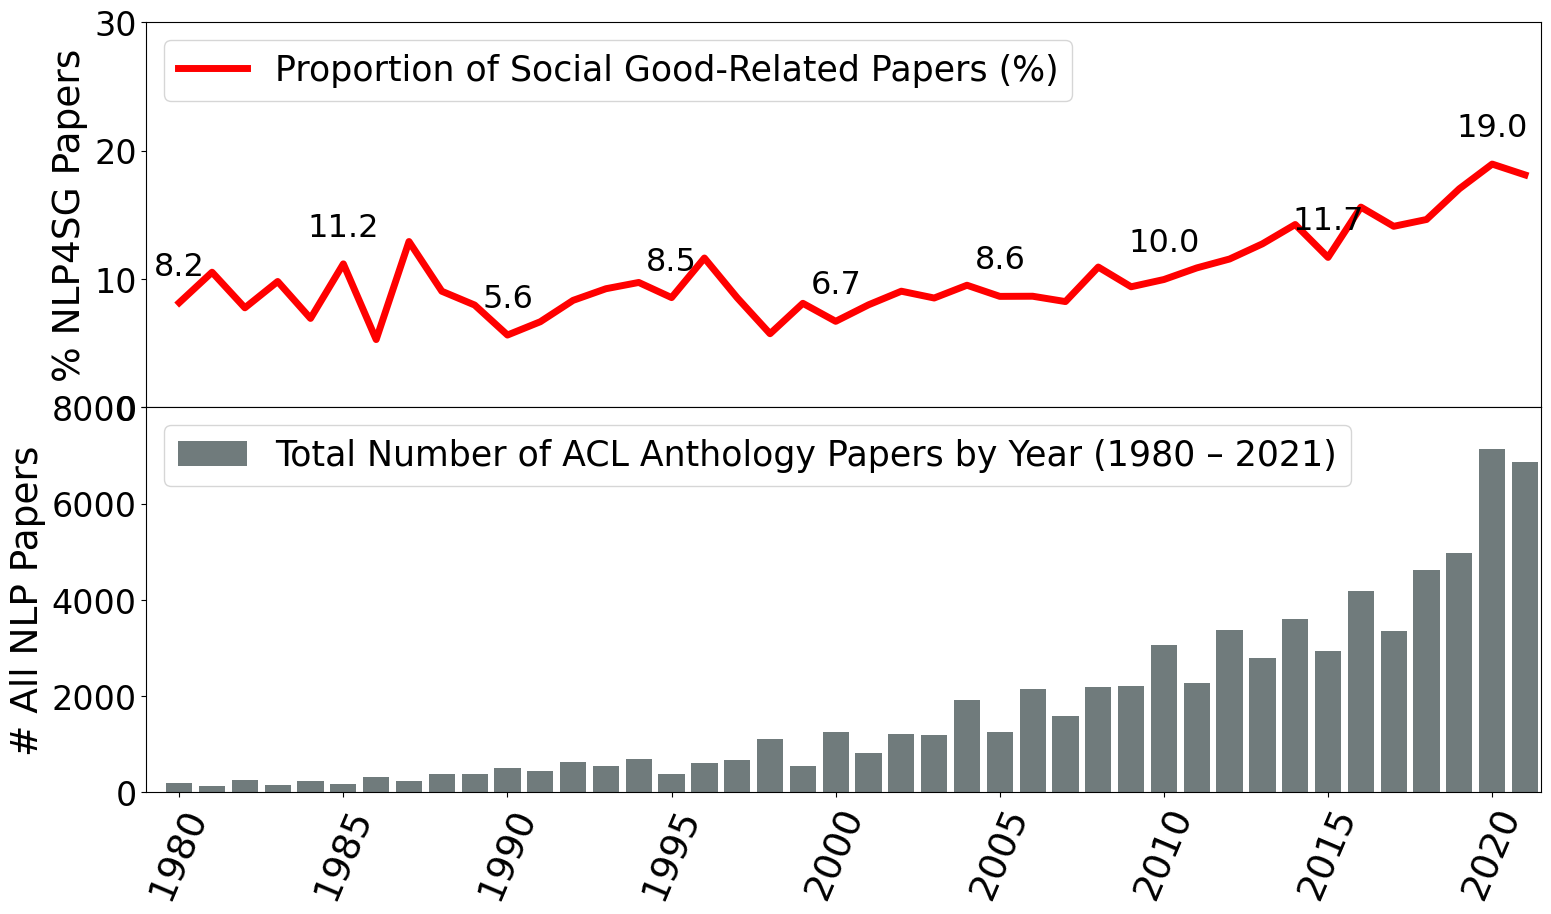

In [56]:
fig, ax = plt.subplots(2, 1,sharex=True,figsize=(18, 10))

ax.flatten()[1].bar(df_plot['year'],df_plot['Total ACL papers'],label='Total Number of ACL Anthology Papers by Year (1980 – 2021)',color='#707B7C')
#ax.flatten()[1].bar(df_plot['year'],df_plot['NLP4SG'],label='NLP4SG',color='#13d14c')
ax.flatten()[1].legend(loc="upper left",prop={'size': 25})
ax.flatten()[0].plot(df_plot_prop['year'],df_plot_prop['prop'], color='red',linewidth=5,label='Proportion of Social Good-Related Papers (%)')
ax.flatten()[0].set_ylim([0, 30])
ax.flatten()[1].set_ylim([0, 8000])
ax.flatten()[0].set_xlim([1979, 2021.5])
ax.flatten()[0].legend(loc="upper left",prop={'size': 25})
ax.flatten()[1].set_ylabel('# All NLP Papers', fontsize=27)
ax.flatten()[0].set_ylabel('% NLP4SG Papers', fontsize=27)
plt.subplots_adjust(wspace=0, hspace=0)
counter=4
for x,y in zip(df_plot_prop['year'],df_plot_prop['prop']):
    counter+=1
    if counter%5==0:
        label = "{:.1f}".format(y)

        ax.flatten()[0].annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,20), # distance from text to points (x,y)
                    fontsize=23,
                     ha='center') # horizontal alignment can be left, right or center

#labels=['1975','1980','1985','1990','1995','2000','2005','2010','2015','2020']
#plt.setp(ax,xticks=[int(t)/2022 for t in labels],xticklabels=labels)
plt.tick_params(axis="x", labelsize=27,rotation=67) 
ax.flatten()[0].tick_params(axis="y", labelsize=24) 
ax.flatten()[1].tick_params(axis="y", labelsize=24)
plt.savefig('dist_papers_anthology.pdf', dpi=700,bbox_inches='tight')
plt.show()


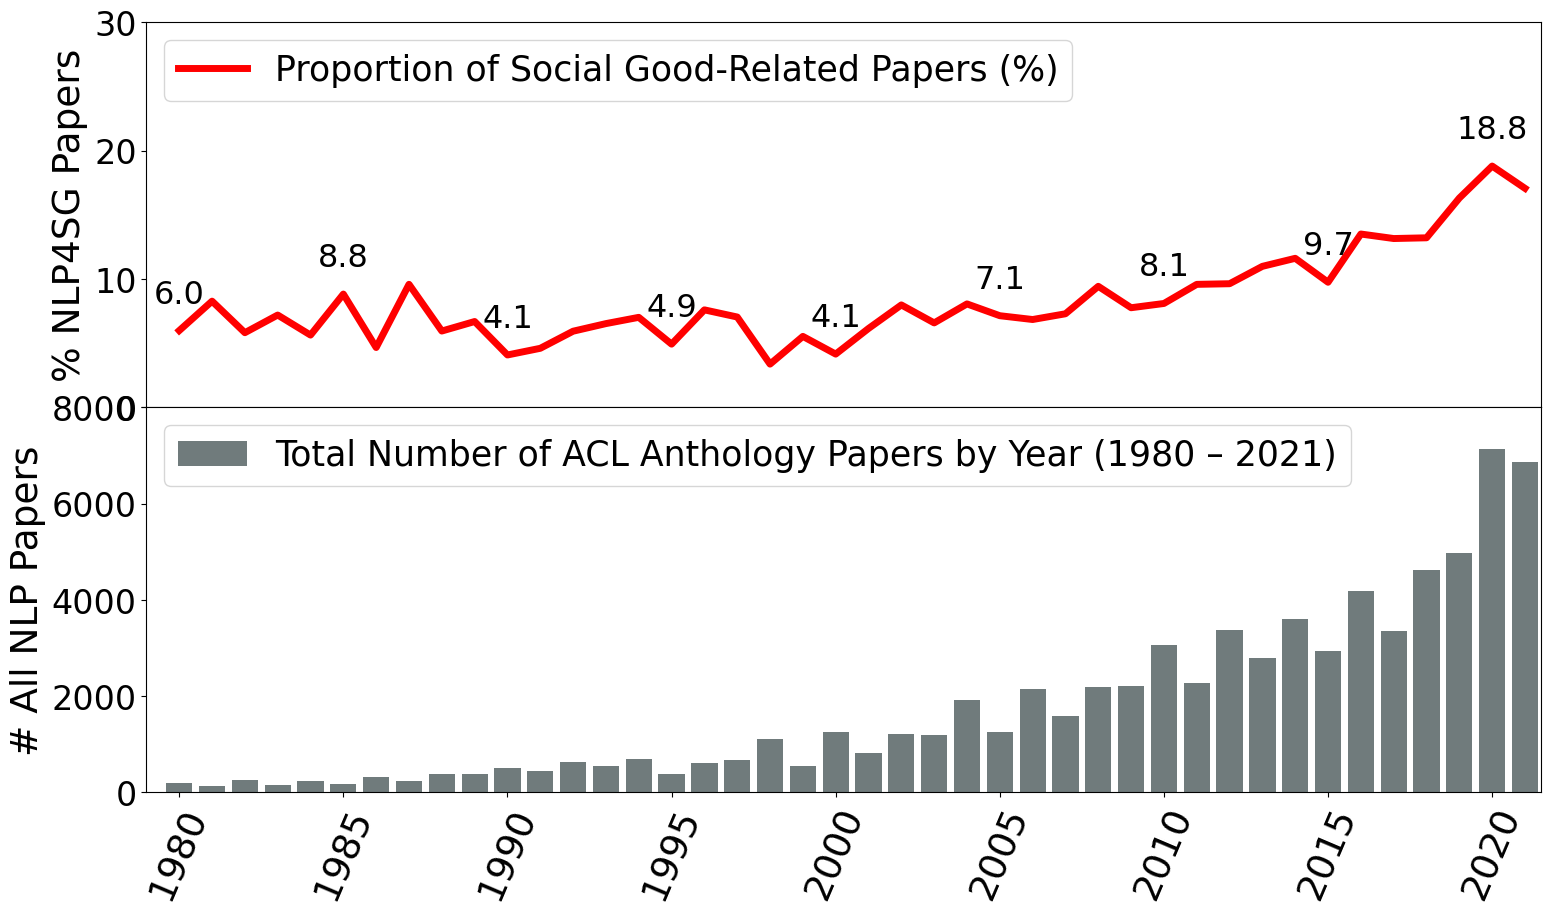

In [35]:
fig, ax = plt.subplots(2, 1,sharex=True,figsize=(18, 10))

ax.flatten()[1].bar(df_plot['year'],df_plot['Total ACL papers'],label='Total Number of ACL Anthology Papers by Year (1980 – 2021)',color='#707B7C')
#ax.flatten()[1].bar(df_plot['year'],df_plot['NLP4SG'],label='NLP4SG',color='#13d14c')
ax.flatten()[1].legend(loc="upper left",prop={'size': 25})
ax.flatten()[0].plot(df_plot_prop['year'],df_plot_prop['prop'], color='red',linewidth=5,label='Proportion of Social Good-Related Papers (%)')
ax.flatten()[0].set_ylim([0, 30])
ax.flatten()[1].set_ylim([0, 8000])
ax.flatten()[0].set_xlim([1979, 2021.5])
ax.flatten()[0].legend(loc="upper left",prop={'size': 25})
ax.flatten()[1].set_ylabel('# All NLP Papers', fontsize=27)
ax.flatten()[0].set_ylabel('% NLP4SG Papers', fontsize=27)
plt.subplots_adjust(wspace=0, hspace=0)
counter=4
for x,y in zip(df_plot_prop['year'],df_plot_prop['prop']):
    counter+=1
    if counter%5==0:
        label = "{:.1f}".format(y)

        ax.flatten()[0].annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,20), # distance from text to points (x,y)
                    fontsize=23,
                     ha='center') # horizontal alignment can be left, right or center

#labels=['1975','1980','1985','1990','1995','2000','2005','2010','2015','2020']
#plt.setp(ax,xticks=[int(t)/2022 for t in labels],xticklabels=labels)
plt.tick_params(axis="x", labelsize=27,rotation=67) 
ax.flatten()[0].tick_params(axis="y", labelsize=24) 
ax.flatten()[1].tick_params(axis="y", labelsize=24)
#plt.savefig('dist_papers_anthology.pdf', dpi=700)
plt.show()

<Figure size 432x288 with 0 Axes>